<a href="https://colab.research.google.com/github/jihoover77/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Amount_of_lead_in_lipstick_anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()



Saving lead_lipstick.csv to lead_lipstick (1).csv


In [44]:
# read in our file from the website 
# http://users.stat.ufl.edu/~winner/datasets.html 
# create a DataFrame called lead_in_lipstick

lead_in_lipstick = pd.read_csv('lead_lipstick.csv')

# Display the first 5 and last 5 rows of lead_in_lipstick
display(lead_in_lipstick)

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry
0,C135,NL,NL,3.75,0.24,Red,LP,2
1,C18,FI,FI,2.29,0.07,Red,LP,2
2,C20,FI,IT,1.27,0.06,Red,LP,2
3,C164,DE,FR,1.21,0.06,Red,LP,2
4,C71,MT,UK,0.85,0.04,Red,LP,2
...,...,...,...,...,...,...,...,...
218,C108,IT,IT,0.24,0.01,Brown,LG,1
219,C52,FR,FR,0.23,0.01,Brown,LG,2
220,C14,PL,FR,0.19,0.01,Brown,LG,2
221,C32,EL,DE,0.09,0.01,Brown,LG,1


In [45]:
display(lead_in_lipstick['Pb'].max()); display(lead_in_lipstick['Pb'].min())

3.75

0.04

In [46]:
lead_in_lipstick.loc[(lead_in_lipstick['Pb'] > 1), 'leadContent'] = "Lead content greater than 1 (mg/kg)"
lead_in_lipstick.loc[(lead_in_lipstick['Pb'] <= 1), 'leadContent'] = "Lead content less than or equal to 1 (mg/kg)"

lead_in_lipstick_counts = pd.DataFrame(lead_in_lipstick.value_counts('leadContent'))

lead_in_lipstick_counts.head()


,0
leadContent,
Lead content less than or equal to 1 (mg/kg),174
Lead content greater than 1 (mg/kg),49


[]

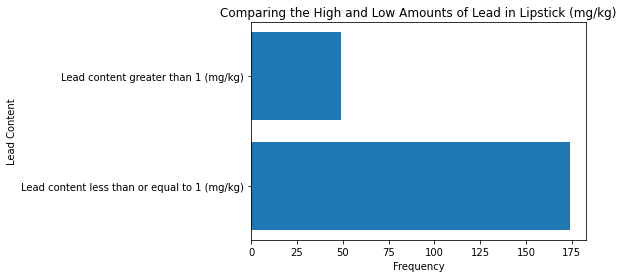

In [47]:
fig, ax = plt.subplots()

ax.barh(lead_in_lipstick_counts.index, lead_in_lipstick_counts[0])
ax.set_ylabel("Lead Content")
ax.set_xlabel("Frequency")
ax.set_title('Comparing the High and Low Amounts of Lead in Lipstick (mg/kg)')




plt.plot()

In [48]:
lead_in_lipstick.head()

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry,leadContent
0,C135,NL,NL,3.75,0.24,Red,LP,2,Lead content greater than 1 (mg/kg)
1,C18,FI,FI,2.29,0.07,Red,LP,2,Lead content greater than 1 (mg/kg)
2,C20,FI,IT,1.27,0.06,Red,LP,2,Lead content greater than 1 (mg/kg)
3,C164,DE,FR,1.21,0.06,Red,LP,2,Lead content greater than 1 (mg/kg)
4,C71,MT,UK,0.85,0.04,Red,LP,2,Lead content less than or equal to 1 (mg/kg)


In [49]:
shades_of_lipstick = pd.DataFrame(lead_in_lipstick.sort_values(by='shade').value_counts('shade'))
shades_of_lipstick.head()

,0
shade,
Pink,81
Brown,60
Red,45
Purple,37


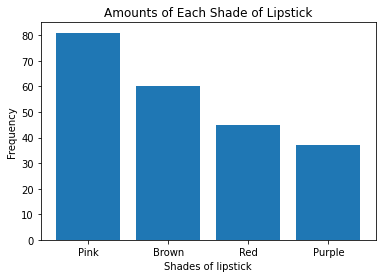

In [50]:
fig, ax = plt.subplots()

ax.bar(shades_of_lipstick.index, shades_of_lipstick[0])

ax.set_xlabel('Shades of lipstick')
ax.set_ylabel('Frequency')
ax.set_title('Amounts of Each Shade of Lipstick')

plt.show()

In [51]:
# Uploaded a data set the contains alpha-2 country codes and the name of the country
# File is located at this URL https://gist.github.com/tadast/8827699

from google.colab import files
uploaded = files.upload()

Saving countries_codes_and_coordinates.csv to countries_codes_and_coordinates (1).csv


In [52]:
# Read in the file and saved it to a DataFrame called country_codes

country_codes = pd.read_csv('countries_codes_and_coordinates.csv')

country_codes.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [53]:
# Remove the "" from the Alpha - 2 code column using the apply method
# rename it prodCntry
# Join the two on=prodCntry how=inner retain only the the column Country

In [91]:
Alpha_2_code = "AF"
Alpha_2_code.strip('"')
def remove_quotations(string):
  return string.strip('" "')

country_codes['prodCntry'] = country_codes['Alpha-2 code'].apply(remove_quotations)
country_codes.head()


,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average),prodCntry
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65""",AF
1,Albania,"""AL""","""ALB""","""8""","""41""","""20""",AL
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3""",DZ
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170""",AS
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6""",AD


In [92]:
# merged only two of the columns from country_codes prodCntry and Country
lipstick_country_added = pd.DataFrame(pd.merge(lead_in_lipstick, country_codes[['prodCntry', 'Country']], on='prodCntry', how='inner'))
display(lipstick_country_added)

,JRC_code,purchCntry,prodCntry,Pb,sdPb,shade,prodType,priceCatgry,leadContent,Country
0,C135,NL,NL,3.75,0.24,Red,LP,2,Lead content greater than 1 (mg/kg),Netherlands
1,C140,NL,NL,0.77,0.03,Red,LP,2,Lead content less than or equal to 1 (mg/kg),Netherlands
2,C131,NL,NL,1.33,0.01,Purple,LP,2,Lead content greater than 1 (mg/kg),Netherlands
3,C132,NL,NL,1.71,0.23,Pink,LP,2,Lead content greater than 1 (mg/kg),Netherlands
4,C136,NL,NL,0.25,0.04,Brown,LP,2,Lead content less than or equal to 1 (mg/kg),Netherlands
...,...,...,...,...,...,...,...,...,...,...
168,C24,FI,SE,0.74,0.01,Pink,LG,2,Lead content less than or equal to 1 (mg/kg),Sweden
169,C9,PL,PL,0.87,0.03,Pink,LP,1,Lead content less than or equal to 1 (mg/kg),Poland
170,C10,PL,PL,0.68,0.05,Pink,LP,1,Lead content less than or equal to 1 (mg/kg),Poland
171,C11,PL,PL,1.46,0.07,Brown,LP,1,Lead content greater than 1 (mg/kg),Poland


In [102]:
# Created a DataFrame with the country that had the highest level of lead in lipstick
# using the max() method

df_country_highest_lead = pd.DataFrame(lipstick_country_added[lipstick_country_added['Pb'] == lipstick_country_added['Pb'].max()])

# Used the iloc method to locate and grab both the country and amount of lead

country_with_highest_lead = df_country_highest_lead.iloc[0, 9]

highest_amount_lead = df_country_highest_lead.iloc[0, 3]

# Used string concatenation and str() function to print out the country and its lead content

print('The country with the highest average lead content in their lipstick was ' + country_with_highest_lead + " at " + str(highest_amount_lead) + " mg/kg.")


The country with the highest average lead content in their lipstick is Netherlands at 3.75 mg/kg.


In [104]:
df_country_lowest_lead =  pd.DataFrame(lipstick_country_added[lipstick_country_added['Pb'] == lipstick_country_added['Pb'].min()])

country_with_lowest_lead = df_country_lowest_lead.iloc[0, 9]

lowest_amount_lead = df_country_lowest_lead.iloc[0, 3]

print('The country with the lowest average lead content in their lipstick was ' + country_with_lowest_lead + " at " + str(lowest_amount_lead) + " mg/kg.")

The country with the lowest average lead content in their lipstick was Italy at 0.04 mg/kg.
